# Keras Model for a Simple Linear Function

In this notebook, I've created a simple Keras model to approximate a linear function. I am new to Keras and deep learning in general and this exercise really helped me understand what's happening in a Keras neural network model.

Trying to predict a simple linear function like this with a neural network is, of course, overkill. But using a linear function makes it easy to see how different aspects of a Keras model, like the learning rate, input normalization, stochastic gradient descent, and dataset size, affect the performance of the model, without getting confused by image processing or other concepts necessary to understand other neural network examples.

# Plot inline and import all necessary libraries and functions

In [176]:
%matplotlib inline

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns

from keras.layers import Dense, Input, Flatten
from keras.models import Model, Sequential
from keras import initializers

# Create a dataset that approximates a linear function with some noise

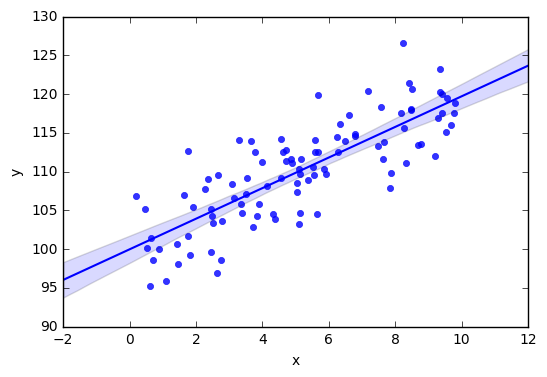

In [178]:
## Set the mean, standard deviation, and size of the dataset, respectively
mu, sigma, size = 0, 4, 100

## Set the slope (m) and y-intercept (b), respectively
m, b = 2, 100

## Create a uniformally distributed set of X values between 0 and 10 and store in pandas dataframe
x = np.random.uniform(0,10, size)
df = pd.DataFrame({'x':x})

## Find the "perfect" y value corresponding to each x value given
df['y_perfect'] = df['x'].apply(lambda x: m*x+b)


## Create some noise and add it to each "perfect" y value to create a realistic y dataset
df['noise'] = np.random.normal(mu, sigma, size=(size,))
df['y'] = df['y_perfect']+df['noise']

## Plot our noisy dataset with a standard linear regression 
## (note seaborn, the plotting library, does the linear regression by default)
ax1 = sns.regplot(x='x', y='y', data=df)


# Create a callback function so we can track the progress of our predictions through epochs

In [179]:
from keras.callbacks import Callback

class PrintAndSaveWeights(Callback):
    """
    Print and save the weights after each epoch.
    """
    
    def on_train_begin(self, logs={}):
        """
        Create our weights history list when we begin training
        """
        self.weights_history = {"m":[], "b":[]}
    
    def on_epoch_end(self, batch, logs={}):
        """
        At the end of every epoch, save and print our slope and intercept weights
        """
        ## Get the current weights
        current_m = self.model.layers[-1].get_weights()[0][0][0]
        current_b = self.model.layers[-1].get_weights()[1][0]
        
        ## Save them to hour history object
        self.weights_history['m'].append(current_m)
        self.weights_history['b'].append(current_b)
        
        ## Print them after each epoch
        print "\nm=%.2f b=%.2f\n" % (current_m, current_b)

## Initialize our callback function for use in the model later
print_save_weights = PrintAndSaveWeights()

# Create our Keras model to approximate our linear function

The goal of our model will be to find the *weights* that best predict the outputs, given the inputs. In our simple linear, example the *weights* are the *slope (m)* and *y-intercept (b)* of our line.

To do so, we are using single "dense" or "fully connected layer" with a 'linear' activation function.

To get a feel for how models work I tried a few different things:
1. I tried running the model with and without kernel initialization (eg Glorot or Xavier input normalization)
2. I changed the number of epochs
3. I changed the learning rate
4. I changed the amount of data (by adjusting the "size" parameter in the dataset creation cell 
5. I changed the optimizer to 'Adam'

In [180]:
## Create our model with a single dense layer, with a linear activation function and glorot (Xavier) input normalization
model = Sequential([
        Dense(1, activation='linear', input_shape=(1,), kernel_initializer='glorot_uniform')
    ])

## Compile our model using the method of least squares (mse) loss function 
## and a stochastic gradient descent (sgd) optimizer
model.compile(loss='mse', optimizer='sgd') ## To try our model with an Adam optimizer simple replace 'sgd' with 'Adam'

## Set our learning rate to 0.01 and print it
model.optimizer.lr.set_value(.001)
print model.optimizer.lr.get_value()

## Fit our model to the noisy data we create above. Notes: 
## The validation split parameter reserves 20% of our data for validation (ie 80% will be used for training)
## The callback parameter is where we tell our model to use the callback function created above
## I don't really know if using a batch size of 1 makes sense
history = model.fit(x=df['x'], y=df['y'], validation_split=0.2, batch_size=1, epochs=100, callbacks=[print_save_weights])

## As the model is fitting the data you can watch below and see how our m and b parameters are improving

## Save and print our final weights
predicted_m = model.get_weights()[0][0][0]
predicted_b = model.get_weights()[1][0]
print "\nm=%.2f b=%.2f\n" % (predicted_m, predicted_b)

0.0010000000475
Train on 80 samples, validate on 20 samples
Epoch 1/100
59/80 [=====================>........] - ETA: 0s - loss: 3659.8869 
m=15.34 b=5.91

80/80 [==============================] - 0s - loss: 3110.3618 - val_loss: 1853.5087
Epoch 2/100
59/80 [=====================>........] - ETA: 0s - loss: 2189.1645
m=15.03 b=9.13

80/80 [==============================] - 0s - loss: 1938.4876 - val_loss: 1722.6987
Epoch 3/100
58/80 [====================>.........] - ETA: 0s - loss: 1709.1944
m=16.12 b=12.42

80/80 [==============================] - 0s - loss: 1783.8965 - val_loss: 1607.7466
Epoch 4/100
58/80 [====================>.........] - ETA: 0s - loss: 1854.4845
m=15.33 b=15.36

80/80 [==============================] - 0s - loss: 1698.3977 - val_loss: 1489.3571
Epoch 5/100
58/80 [====================>.........] - ETA: 0s - loss: 1442.5830
m=14.58 b=18.21

80/80 [==============================] - 0s - loss: 1584.5385 - val_loss: 1385.7714
Epoch 6/100
58/80 [====================>.

# Plot our model's *slope (m)* and *y-intercept (b)* guesses over each epoch 
Seeing this plot really helped me understand how the model improves its guesses over each epoch

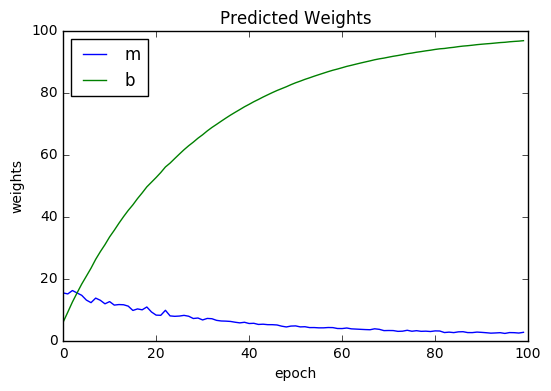

In [181]:
import matplotlib.pyplot as plt

plt.plot(print_save_weights.weights_history['m'])
plt.plot(print_save_weights.weights_history['b'])
plt.title('Predicted Weights')
plt.ylabel('weights')
plt.xlabel('epoch')
plt.legend(['m', 'b'], loc='upper left')
plt.show()

# Plot our model's loss function over time
Seeing this plot really helped me understand how the model is improving its loss over each epoch.

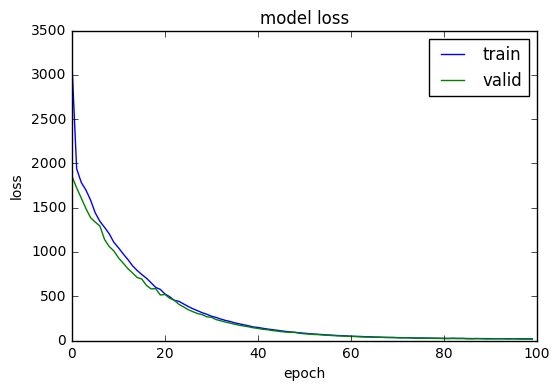

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

# Plot our model's prediction over the data and real line

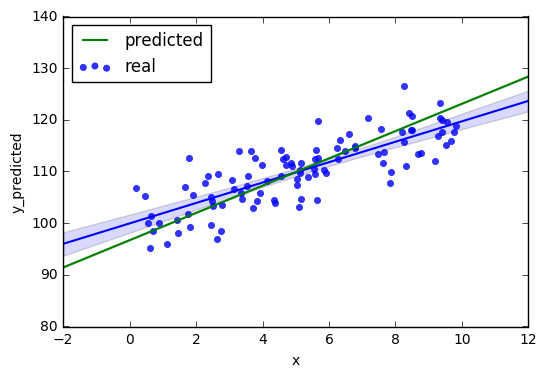

In [183]:
## Create our predicted y's based on the model
df['y_predicted'] = df['x'].apply(lambda x: predicted_m*x + predicted_b)

## Plot the original data with a standard linear regression
ax1 = sns.regplot(x='x', y='y', data=df, label='real')

## Plot our predicted line based on our Keras model's slope and y-intercept
ax2 = sns.regplot(x='x', y='y_predicted', data=df, scatter=False, label='predicted')
ax2.legend(loc="upper left")

# Conclusion

As we would expect, the standard linear regression does a slightly better job of approximating our linear data (duh). But we've also done something pretty cool with our Keras model. Without explicitly telling our model that our data was approximately linear, it sort of "learned" that it was. This means we can use the same technique of neural network for functions that aren't linear (like image processing, or speech recognition).  